In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing

In [ ]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
def build_regression_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])
    return model

In [ ]:
model = build_regression_model()



In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=25,
    batch_size=16,
    validation_data=(x_test, y_test),
    verbose=0
)

In [ ]:
loss, mae = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)

print(f" DNN Test MAE: {mae:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
 DNN Test MAE: 2.75


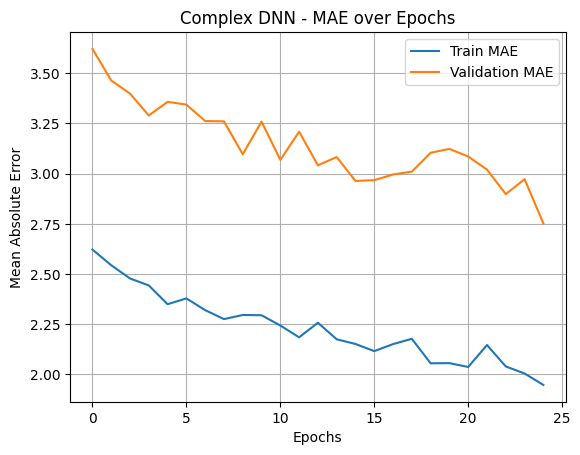

In [ ]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Complex DNN - MAE over Epochs')
plt.legend()
plt.grid(True)
plt.show()


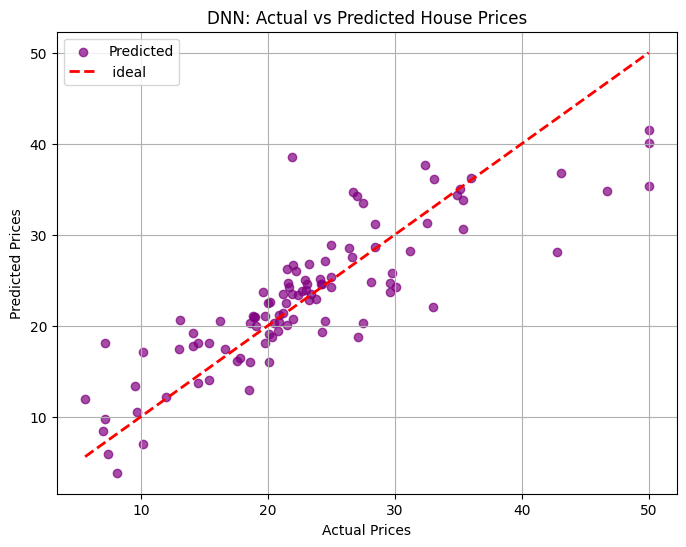

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple', label='Predicted')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label=' ideal ')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('DNN: Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test_scaled)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Linear Regression MAE: {mae:.2f}")

Linear Regression MAE: 3.46


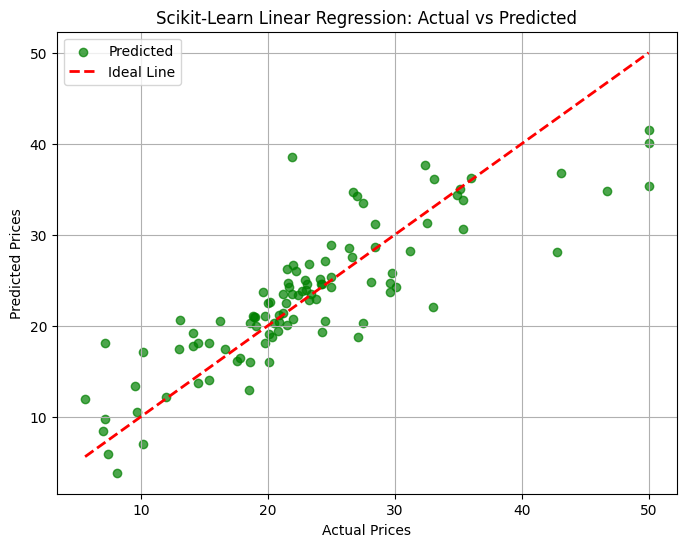

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green', label='Predicted')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Ideal Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Scikit-Learn Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

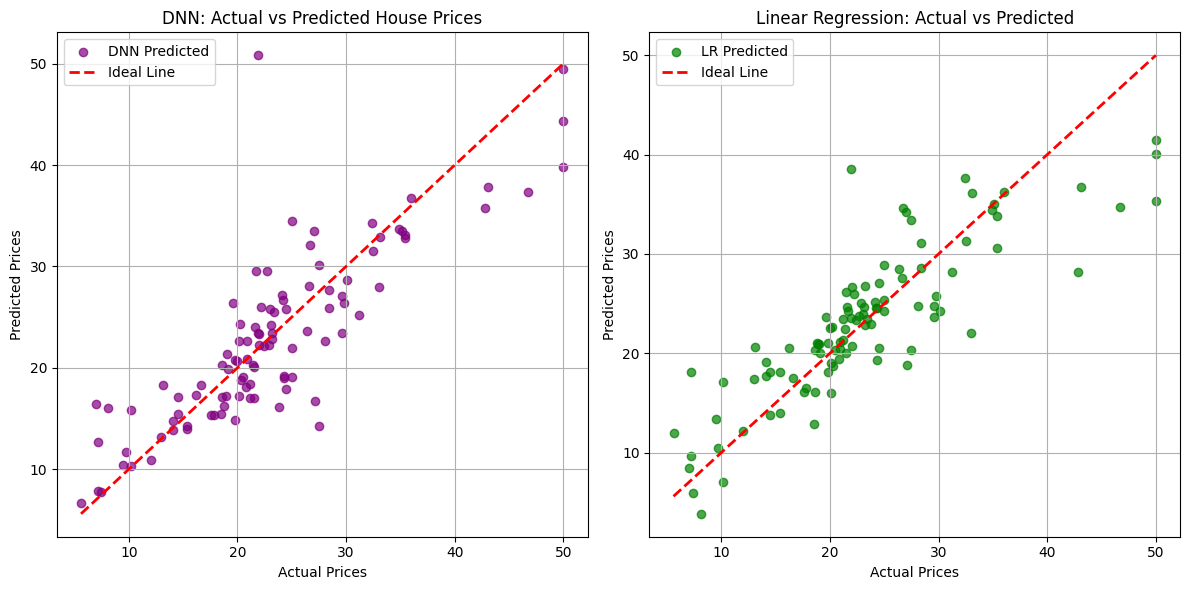

In [ ]:
plt.figure(figsize=(12, 6))

# DNN predictions plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_dnn, alpha=0.7, color='purple', label='DNN Predicted')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Ideal Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('DNN: Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)

# Linear Regression predictions plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='green', label='LR Predicted')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Ideal Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Conclusion**
The comparison between the Deep Neural Network (DNN) model and Linear Regression on the Boston Housing dataset reveals several key insights:

**Performance Comparison:**

The DNN model achieved a test MAE of 2.75 while Linear Regression achieved 3.46, showing that DNN performs better.


